# Step 1: Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv' , sep='\t')

In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_alexa['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)



# Step 2: Data Vizualization




In [5]:
positive = df_alexa[df_alexa['feedback']==1]
negative = df_alexa[df_alexa['feedback']==0]

In [6]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [7]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


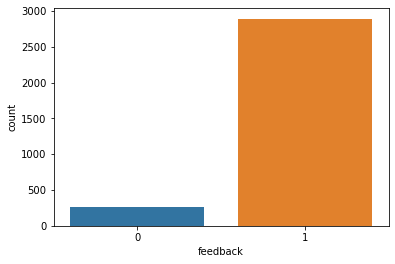

In [8]:
sns.countplot(df_alexa['feedback'])

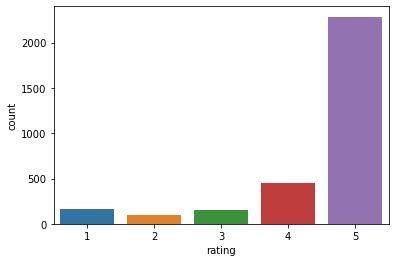

In [9]:
sns.countplot(df_alexa['rating'])

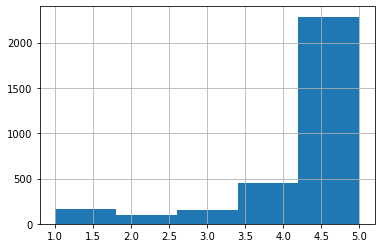

In [10]:
df_alexa['rating'].hist(bins=5)

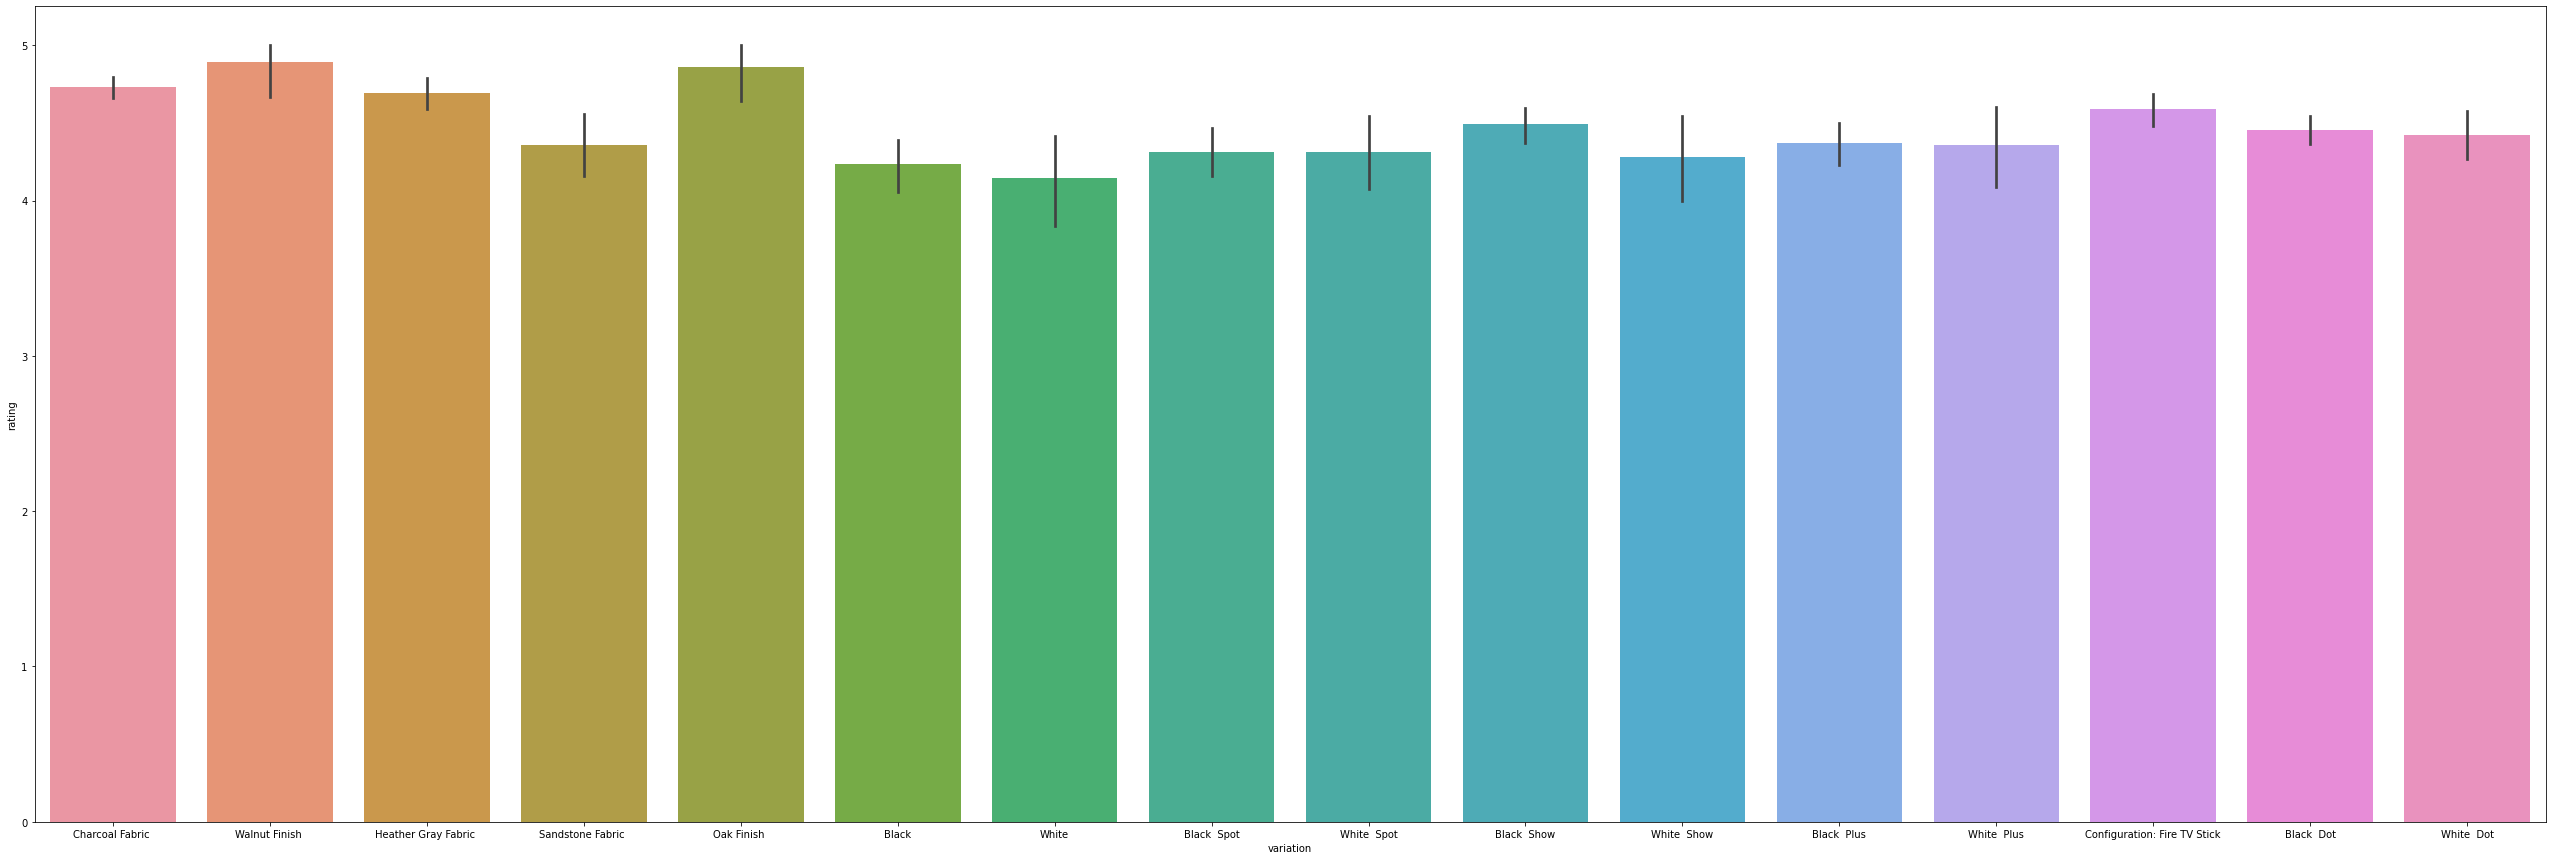

In [11]:
plt.figure(figsize=(45,15))
sns.barplot(x='variation' , y='rating' , data= df_alexa)

# Step 3: Data Cleaning

In [12]:
df_alexa = df_alexa.drop( ['date' ,'rating'] , axis=1)

In [13]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


# Step 4: Analysing the Sentiments

In [14]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

polarity=[]
subjectivity=[] 
for i in df_alexa['verified_reviews'].values:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)

In [15]:
df_alexa['polarity']=polarity
df_alexa['subjectivity']=subjectivity

In [16]:
df_alexa.head()

,variation,verified_reviews,feedback,polarity,subjectivity
0,Charcoal Fabric,Love my Echo!,1,0.625,0.6000
1,Charcoal Fabric,Loved it!,1,0.875,0.8000
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.100,0.5125
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.350,0.4500
4,Charcoal Fabric,Music,1,0.000,0.0000


In [17]:
df_alexa = df_alexa.drop(['feedback'] , axis = 1)

### Displaying positive comments

In [18]:
df_alexa[df_alexa.polarity > 0].head(10)

,variation,verified_reviews,polarity,subjectivity
0,Charcoal Fabric,Love my Echo!,0.625000,0.600000
1,Charcoal Fabric,Loved it!,0.875000,0.800000
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,0.350000,0.450000
5,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,0.294643,0.508929
6,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",0.216667,0.458333
7,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,0.200000,0.200000
8,Heather Gray Fabric,looks great,0.800000,0.750000
9,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,0.988281,0.675000
10,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",0.050000,0.266667
11,Charcoal Fabric,I love it! Learning knew things with it eveyda...,0.403646,0.633333


### Displaying negative comments

In [19]:
df_alexa[df_alexa.polarity < 0].head(10)

,variation,verified_reviews,polarity,subjectivity
2,Walnut Finish,"Sometimes while playing a game, you can answer...",-0.100000,0.51250
14,Oak Finish,Just what I expected....,-0.100000,0.40000
29,Charcoal Fabric,Just like the other one,-0.125000,0.37500
109,Sandstone Fabric,The outlet does not work with it. Was disappoi...,-0.750000,0.75000
141,Charcoal Fabric,Not much features.,-0.100000,0.20000
145,Sandstone Fabric,it's annoying that everything they show Alexa ...,-0.033333,0.57500
164,Charcoal Fabric,"It performs pretty much as expected, but I am ...",-0.082738,0.63631
176,Heather Gray Fabric,Sad joke. Worthless.,-0.650000,0.95000
262,Sandstone Fabric,Arrived as expected.,-0.100000,0.40000
299,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,-0.500000,1.00000


### Distribution of Polarity

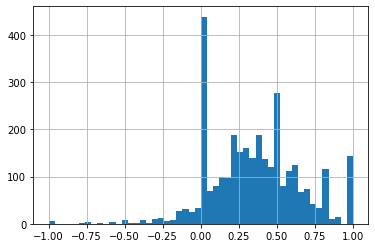

In [20]:
df_alexa.polarity.hist(bins=50)

### Distribution of Subjectivity

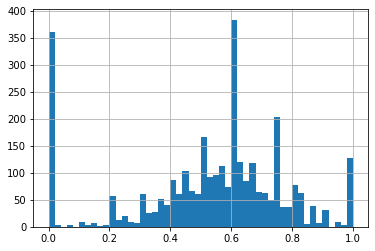

In [21]:
df_alexa.subjectivity.hist(bins=50)

### Converting the polarity values from continuous to categorical

In [22]:
df_alexa['polarity'][df_alexa.polarity==0]= 0
df_alexa['polarity'][df_alexa.polarity > 0]= 1
df_alexa['polarity'][df_alexa.polarity < 0]= -1

In [23]:
df_alexa.polarity.value_counts()

 1.0    2565
 0.0     396
-1.0     189
Name: polarity, dtype: int64

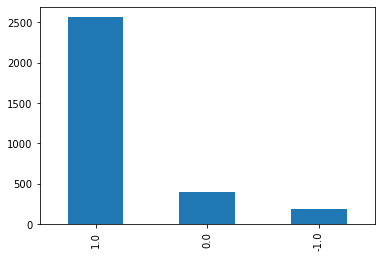

In [24]:
df_alexa.polarity.value_counts().plot.bar()

# Step 5: Feature Engineering

In [25]:
v_dummies = pd.get_dummies(df_alexa['variation'])
v_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
df_alexa.drop(['variation'] , axis=1 , inplace = True)
df_alexa = pd.concat([df_alexa , v_dummies ] , axis = 1)
df_alexa.head()

,verified_reviews,polarity,subjectivity,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1.0,0.6000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1.0,0.8000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",-1.0,0.5125,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1.0,0.4500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,0.0,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_vect = vectorizer.fit_transform( df_alexa['verified_reviews'] )

In [28]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [29]:
print(alexa_vect)

  (0, 2150)	1
  (0, 2320)	1
  (0, 1160)	1
  (1, 2151)	1
  (1, 1933)	1
  (2, 1933)	1
  (2, 3289)	1
  (2, 3945)	2
  (2, 2640)	1
  (2, 1504)	1
  (2, 4028)	3
  (2, 588)	1
  (2, 256)	1
  (2, 2794)	1
  (2, 853)	1
  (2, 559)	1
  (2, 196)	1
  (2, 3059)	1
  (2, 1567)	1
  (2, 4008)	1
  (2, 250)	2
  (2, 259)	1
  (2, 3578)	1
  (2, 3044)	1
  (2, 314)	1
  :	:
  (3148, 2827)	1
  (3148, 3487)	1
  (3148, 3330)	1
  (3148, 2789)	2
  (3148, 3607)	1
  (3148, 1553)	1
  (3148, 569)	1
  (3148, 1106)	1
  (3148, 3283)	1
  (3148, 1475)	1
  (3148, 1481)	1
  (3148, 1113)	2
  (3148, 1730)	1
  (3148, 3508)	1
  (3148, 1983)	1
  (3148, 1927)	1
  (3148, 2300)	1
  (3148, 347)	1
  (3148, 2023)	1
  (3148, 3408)	1
  (3148, 765)	1
  (3148, 2257)	1
  (3148, 1729)	1
  (3148, 505)	1
  (3149, 1561)	1


In [30]:
df_alexa.drop( ['verified_reviews'] , axis = 1 , inplace = True)
reviews = pd.DataFrame( alexa_vect.toarray() )
df_alexa = pd.concat( [df_alexa , reviews] , axis = 1)
df_alexa.head(10)

,polarity,subjectivity,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1.0,0.600000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.800000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.0,0.512500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.450000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.508929,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.458333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.200000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0.750000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.675000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x = df_alexa.drop(['subjectivity' , 'polarity'] , axis = 1)

In [32]:
x.shape

(3150, 4060)

In [33]:
y = df_alexa['polarity']

# Step 6: Training the data

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 5)

In [35]:
x_train.shape

(2205, 4060)

In [36]:
x_test.shape

(945, 4060)

In [37]:
y_train.shape

(2205,)

In [38]:
y_test.shape

(945,)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')

In [41]:
random_forest_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

# Step 7: Evaluating the Data

In [42]:
y_predict_train = random_forest_classifier.predict(x_train)

In [43]:
y_predict_train

array([0., 1., 1., ..., 1., 1., 1.])

In [44]:
y_train

2609    0.0
1445    1.0
2089    1.0
1653    1.0
975     1.0
       ... 
1424    1.0
3046    1.0
1725    1.0
2254    1.0
2915    1.0
Name: polarity, Length: 2205, dtype: float64

In [45]:
cm = confusion_matrix(y_train , y_predict_train)

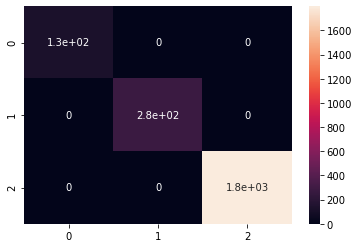

In [46]:
sns.heatmap(cm , annot = True)

In [47]:
print(classification_report(y_train , y_predict_train))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       127
         0.0       1.00      1.00      1.00       279
         1.0       1.00      1.00      1.00      1799

    accuracy                           1.00      2205
   macro avg       1.00      1.00      1.00      2205
weighted avg       1.00      1.00      1.00      2205



In [48]:
y_predict = random_forest_classifier.predict(x_test)

In [49]:
cm = confusion_matrix(y_test , y_predict)

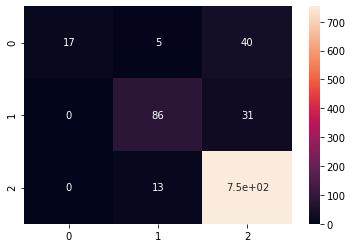

In [50]:
sns.heatmap(cm , annot = True)

In [51]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

        -1.0       1.00      0.27      0.43        62
         0.0       0.83      0.74      0.78       117
         1.0       0.91      0.98      0.95       766

    accuracy                           0.91       945
   macro avg       0.91      0.66      0.72       945
weighted avg       0.91      0.91      0.89       945



# Step 7: Improving the Model

In [52]:
df_alexa = pd.read_csv('amazon_alexa.tsv' , sep='\t')

In [53]:
df_alexa = pd.concat( [df_alexa , pd.DataFrame(alexa_vect.toarray())] , axis = 1)
df_alexa['polarity']=polarity
df_alexa['subjectivity']=subjectivity

In [54]:
df_alexa['polarity'][df_alexa.polarity==0]= 0
df_alexa['polarity'][df_alexa.polarity > 0]= 1
df_alexa['polarity'][df_alexa.polarity < 0]= -1

In [55]:
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4036,4037,4038,4039,4040,4041,4042,4043,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.600000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.800000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0.512500
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.450000
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.000000
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.452381
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.533766
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.632099


In [56]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)

In [57]:
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4037,4038,4039,4040,4041,4042,4043,polarity,subjectivity,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.600000,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.800000,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.0,0.512500,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.450000,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1.000000,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.452381,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.533766,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.632099,380


In [58]:
x = df_alexa.drop(['rating' , 'date' , 'variation', 'verified_reviews' , 'feedback' , 'subjectivity' , 'polarity'] , axis = 1) 

In [59]:
x

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,441
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380


In [60]:
y = df_alexa['polarity']

In [61]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 5)

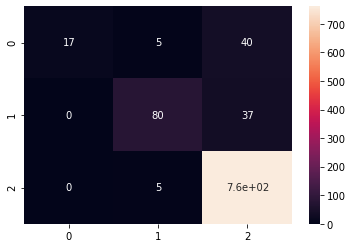

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 200,criterion = 'entropy')
random_forest_classifier.fit(x_train,y_train)

y_predict = random_forest_classifier.predict(x_test)
cm = confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot = True)

In [63]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

        -1.0       1.00      0.27      0.43        62
         0.0       0.89      0.68      0.77       117
         1.0       0.91      0.99      0.95       766

    accuracy                           0.91       945
   macro avg       0.93      0.65      0.72       945
weighted avg       0.91      0.91      0.89       945

